,State,Population,ABBREVIATION,how many deaths in state,deaths_on_1000_inhabitants
0,Alaska,731545,AK,39,0.05
1,Alabama,4903185,AL,104,0.02
2,Arkansas,3017825,AR,83,0.03
3,Arizona,7278717,AZ,254,0.03
4,California,39512223,CA,799,0.02
5,Colorado,5758736,CO,195,0.03
6,Connecticut,3565287,CT,21,0.01
7,District of Columbia,705749,DC,13,0.02
8,Delaware,973764,DE,13,0.01
9,Florida,19453561,FL,350,0.02


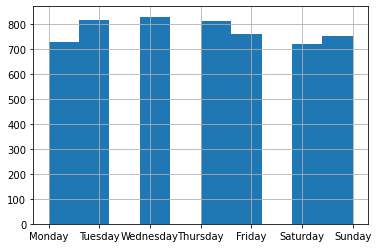

In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

df=pd.read_excel('fatal-police-shootings-data.xlsx')
table1=df.pivot_table(values='signs_of_mental_illness',index='race',aggfunc=np.sum)
check_false_sings=df.pivot_table(values='id',index='race',columns='signs_of_mental_illness',aggfunc=np.count_nonzero)

table1['False']=[69,1114,745,64,37,1763]

def percentage(row):
    perc=row['signs_of_mental_illness']/(row['signs_of_mental_illness']+row['False'])
    return perc

table1['percentage_of_mental_illness']=table1.apply(lambda row: percentage(row),axis=1).round(2)

#Największym odsetkiem znamion choroby psychicznej podczas interwencji charakteryzuje się rasa "W".

table2=df.pivot_table(values='date',index='id')
table2.sort_values(by ='date', inplace = True)

table2['day_of_week']=table2['date'].dt.day_name()

sorter = dict(zip(table2['day_of_week'].unique(),['4','5','6','0','1','2','3']))
table2['day_id'] = table2['day_of_week'].map(sorter)
table2.sort_values('day_id', inplace=True)
table2['day_of_week'].hist()

data=pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states_by_population', header=0)
data1=pd.read_html('https://www.ssa.gov/international/coc-docs/states.html', header=0)

data[0].sort_values('Rank in states & territories, 2019',inplace=True)
data[0].drop([56,57,58,59],axis=0,inplace=True)
data[0].drop(['Rank in states & territories, 2010','Census population, April 1, 2010[3]','Percent change, 2010–2019[note 1]','Absolute change, 2010-2019','Total seats in the U.S. House of Representatives, 2013–2023','Estimated population per electoral vote, 2019[note 2]','Estimated population per House seat, 2019','Census population per House seat, 2010','Percent of the total U.S. population, 2018[note 3]'], axis=1,inplace=True)
data[0].sort_values(by=['State'],inplace=True, ascending=True)
table3=data1[0].rename(columns={'ALABAMA':'STATE','AL':'ABBREVIATION'})
table3.loc[50,['STATE']]=['U.S. VIRGIN ISLANDS']
table3.loc[len(table3.index)] = ['ALABAMA','AL']
table3.sort_values(by=['STATE'], inplace=True, ascending=True)

data[0].reset_index(inplace=True)
table3.reset_index(inplace=True)

table4=pd.concat([data[0],table3],axis=1)
table4.drop(['index','STATE','Rank in states & territories, 2019'],axis=1,inplace=True)
table4.drop([2,12,37,42,48],axis=0,inplace=True)
table4.reset_index(inplace=True)
table4.sort_values(by=['ABBREVIATION'],inplace=True,ascending=True)
table4.reset_index(inplace=True)
table5=df.pivot_table(values='id', index='state',aggfunc=np.count_nonzero)
table5.rename(columns={'id':'how many deaths in state'}, inplace=True)
table5.sort_values(by=['state'],inplace=True,ascending=True)
table5.reset_index(inplace=True)

table6=pd.concat([table4,table5],axis=1)
table6.drop(['level_0','index','state'],axis=1,inplace=True)
table6.rename(columns={'Population estimate, July 1, 2019[2]':'Population'}, inplace=True)
table6

def deaths_on_1000(row):
    result=row['how many deaths in state']*1000/row['Population']
    return result

table6['deaths_on_1000_inhabitants']=table6.apply(lambda row: deaths_on_1000(row),axis=1).round(2)








